# Kickstarter data exploration: a journey through Pandas

Welcome to a demo of Python's data analysis package called `Pandas`. Our goal is to learn about Data Analysis and transformation using Pandas while exploring datasets used to analyze kickstarter projects. 

Data set used :https://webrobots.io/kickstarter-datasets/ [json format]
> there is the cleaning script in the project src folder

## The story

kickstarter story

### In this process will learn about :
1. Pandas features
1. Pandas data I/O 
1. Storing data in Pandas 
    1. 1D pandas Series 
    1. 2D pandas DataFrame 
1. Indexing
1. Re-indexing 
1. Dealing with dates and times 
1. Cleaning and formatting data
1. Basic Visualization 
1. Data aggregation
    1. Split, apply and combine
    1. groupby
    1. aggregate

## 1. Pandas features
Pandas is a library that makes the analysis of complex, tabular datasets easy .

1. Defines __tabular data types__: database-like tables, with labelled rows and columns
1. __Data consolidation and data integration__: 
    1. remove duplicates
    1. clean data, manage missing values
    1. automatically align tables by index
1. __Summarization__: create “pivot” tables
1. __In-memory, SQL-like operations__: 
    1. join
    1. aggregate (group by)
1. __Very flexible import/export__ of data;
1. __Date and time__ handling built-in, including timezones
1. __Easy visualization__ based on Matplotlib

In [1]:
%matplotlib inline
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display
pd.set_option("display.max_rows", 20)
pd.set_option("display.max_columns", 20)
import ijson
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 16, 5

## 2. Pandas IO
Pandas provides a high-level interface to and from many
1. file formats used in data science: .txt, CSV, json, HTML, clipboard, Excel (.xls .xlsx), pickle, HDF5, SQL, R (exp.), Stata .dta, ...
1. For any given format, there is
    1. a read_** function,
    1. a to_** method attached to all Pandas data objects.

### Pandas IO summary

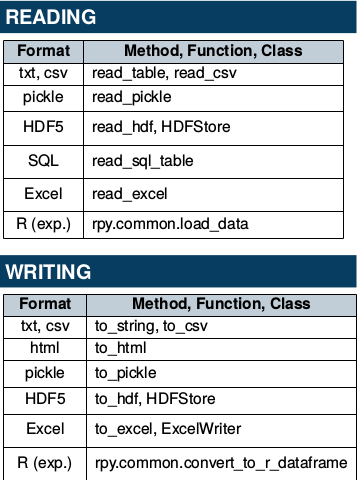

In [2]:
Image("../images/io_summary.png")

In [5]:
kick_df.dtypes

id                         int64
deadline                   int64
launched_at                int64
state                     object
category_type_subtype     object
location_type             object
backers_count              int64
currency                  object
goal                     float64
pledged                  float64
spotlight                   bool
static_usd_rate          float64
usd_pledged              float64
country                   object
country_state             object
dtype: object

In [6]:
kick_df.isnull().sum()

id                       0
deadline                 0
launched_at              0
state                    0
category_type_subtype    0
location_type            0
backers_count            0
currency                 0
goal                     0
pledged                  0
spotlight                0
static_usd_rate          0
usd_pledged              0
country                  0
country_state            0
dtype: int64

## 3. Storing data in Pandas

PANDA = __PAN__el __DA__ta = multi-dimensional data in stats & econometrics.

Introduces 3 size-mutable, labeled data-structures:
1. A __Series__ is a __1D__ data-structure.
1. A __DataFrame__ is a __2D__ data-structure that can be viewed as a dictionary of Series.
1. A __Panel__ is a __3D__ data-structure that can be viewed as a dictionary of DataFrames.

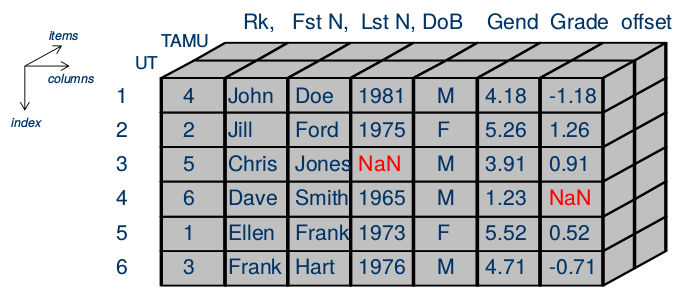

In [3]:
Image("../images/data_frame.png")

### 1. Series, the pandas 1D structure

In [64]:
s = pd.Series([1,3,5,np.nan,6,8])

s

In [65]:
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 2. DataFrame, the pandas 2D structure

In [92]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3] * 4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
    

In [93]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

In [85]:
df = pd.DataFrame(data=np.random.randn(6,4), columns=list('ABCD'))

In [86]:
df

,A,B,C,D
0,1.038776,0.958406,-0.017137,-1.850446
1,-1.233191,-0.189769,1.140490,0.677775
2,-1.408181,-0.167473,-0.428986,0.340263
3,-0.581589,1.137190,-0.492515,1.141369
4,1.526110,-2.338839,-1.673363,-1.798133
5,0.596144,0.620030,-1.782030,1.215353


In [434]:
df.shape

(157127, 16)

In [432]:
df.index

RangeIndex(start=0, stop=157127, step=1)

In [431]:
df.columns

Index(['id', 'deadline', 'launched_at', 'state', 'location_type',
       'backers_count', 'currency', 'goal', 'pledged', 'spotlight',
       'static_usd_rate', 'usd_pledged', 'country', 'country_state',
       'category', 'subcategory'],
      dtype='object')

In [69]:
df.dtypes

A    float64
B    float64
C    float64
D    float64
dtype: object

## 4. Indexing and Re-indexing

Series and DataFrames have powerful indexing capabilities:
1. Values are accessible as NumPy arrays
1. More interestingly: label-based indexing
1. Indices allow automatic alignment: especially interesting with timeseries, and for NaN (missing data) handling (more on this later)

Essentially:
1. Series[label] -> scalar
1. Dataframe[label] -> column

The index of a Pandas data-structure is the key that controls:
1. how the data is displayed and ordered,
1. how to align and combine different datasets.

__The index can be:__
1. shuffled (and the values will follow),
1. overwritten,
1. transformed,
1. set to the values of any of the columns of a DataFrame ,
1. made of multiple sub-indices.

### 1. Accessing one element

In [94]:
df['A'][0]

1.0387759369317342

__Indexing operator [] has an ambiguity:__
1. Series[integer_value]: position or label?
1. DataFrame[integer_value]: position or column name ?

__Simple API's:__
1. __.loc__ attribute: purely __label__
1. __.iloc__ attribute: purely __index-based__, aka position (integer value)


In [73]:
df.loc[0]

A   -1.892355
B   -0.289778
C    1.121379
D    0.489497
Name: 0, dtype: float64

In [72]:
df.iloc[0]

A   -1.892355
B   -0.289778
C    1.121379
D    0.489497
Name: 0, dtype: float64

### 2. SLICING ELEMENTS OUT

(dataframe/series).loc[label_lower:label_upper:step]

In [70]:
df[::2]

,A,B,C,D
0,-1.892355,-0.289778,1.121379,0.489497
2,-0.231020,0.179200,-0.083231,-1.152760
4,-0.237705,-2.182202,0.804879,-0.708827


In [71]:
df.loc[::2]

,A,B,C,D
0,-1.892355,-0.289778,1.121379,0.489497
2,-0.231020,0.179200,-0.083231,-1.152760
4,-0.237705,-2.182202,0.804879,-0.708827


### 3. Boolean INDEXING

In [74]:
df['A'] > 0

0    False
1    False
2    False
3    False
4    False
5     True
Name: A, dtype: bool

In [75]:
df[df['A'] > 0]

,A,B,C,D
5,0.350358,0.407312,-0.777874,-1.513188


In [84]:
df[(df['A'] > 0) | (df['B']> 0)]

,A,B,C,D
1,-0.639601,1.335367,-0.204864,-0.680606
2,-0.231020,0.179200,-0.083231,-1.152760
3,-1.134036,0.062925,0.785109,0.581892
5,0.350358,0.407312,-0.777874,-1.513188


In [40]:
len(fancy_bool)

16

## 5. Re-indexing

### 1. Re-indexing Series

#### 1. RE-INDEXING

In [52]:
# create a series
index = ['a', 'b', 'c', 'd']
s = pd.Series(range(4), index=index)
s

a    0
b    1
c    2
d    3
dtype: int64

In [53]:
# Select a different set of indices
s.reindex(['c', 'b', 'a', 'e'])

c    2.0
b    1.0
a    0.0
e    NaN
dtype: float64

In [55]:
# Sort by values. See s.sort_index()
# to sort based on index value.
s.sort_index(ascending=False)

d    3
c    2
b    1
a    0
dtype: int64

#### 2. ALIGNMENT OF 2 Series

In [58]:
s = pd.Series(range(4), index=index)
# Select a different set of indices
s.reindex(['c', 'b', 'a', 'e'])
s

a    0
b    1
c    2
d    3
dtype: int64

In [59]:
# Sort by values. See s.sort_index()
# to sort based on index value.
s.sort_index(ascending=False)

d    3
c    2
b    1
a    0
dtype: int64

In [60]:
s2 = s.iloc[:-2]

In [62]:
# Operations automatically align on
# the index (different from NumPy)
s + s2
# missing values are filled with NaN

a    0.0
b    2.0
c    NaN
d    NaN
dtype: float64

#### 1. ACCESS ELEMENTS

In [ ]:
df

In [ ]:
df['A']

In [ ]:
series2 = df.B

In [97]:
df.loc[0,'B']

0.95840610383368874

In [105]:
?df.sort_index

In [25]:
df.sort_values(axis=1)

NameError: name 'df' is not defined

In [112]:
df.sort_index(ascending=False)

,A,B,C,D
5,0.596144,0.620030,-1.782030,1.215353
4,1.526110,-2.338839,-1.673363,-1.798133
3,-0.581589,1.137190,-0.492515,1.141369
2,-1.408181,-0.167473,-0.428986,0.340263
1,-1.233191,-0.189769,1.140490,0.677775
0,1.038776,0.958406,-0.017137,-1.850446


#### INDEX TO/FROM A COLUMN

In [98]:
df2 = df.set_index('A')

In [99]:
df2

,B,C,D
A,,,
1.038776,0.958406,-0.017137,-1.850446
-1.233191,-0.189769,1.140490,0.677775
-1.408181,-0.167473,-0.428986,0.340263
-0.581589,1.137190,-0.492515,1.141369
1.526110,-2.338839,-1.673363,-1.798133
0.596144,0.620030,-1.782030,1.215353


In [100]:
df2.reset_index()

,A,B,C,D
0,1.038776,0.958406,-0.017137,-1.850446
1,-1.233191,-0.189769,1.140490,0.677775
2,-1.408181,-0.167473,-0.428986,0.340263
3,-0.581589,1.137190,-0.492515,1.141369
4,1.526110,-2.338839,-1.673363,-1.798133
5,0.596144,0.620030,-1.782030,1.215353


## 5. Dealing with dates and time

#### CREATING DATE/TIME INDEXES

In [145]:
pd.date_range('1/1/2000', periods=4)

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04'], dtype='datetime64[ns]', freq='D')

In [147]:
pd.date_range('1/1/2000', periods=72, freq='H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00', '2000-01-01 05:00:00',
               '2000-01-01 06:00:00', '2000-01-01 07:00:00',
               '2000-01-01 08:00:00', '2000-01-01 09:00:00',
               '2000-01-01 10:00:00', '2000-01-01 11:00:00',
               '2000-01-01 12:00:00', '2000-01-01 13:00:00',
               '2000-01-01 14:00:00', '2000-01-01 15:00:00',
               '2000-01-01 16:00:00', '2000-01-01 17:00:00',
               '2000-01-01 18:00:00', '2000-01-01 19:00:00',
               '2000-01-01 20:00:00', '2000-01-01 21:00:00',
               '2000-01-01 22:00:00', '2000-01-01 23:00:00',
               '2000-01-02 00:00:00', '2000-01-02 01:00:00',
               '2000-01-02 02:00:00', '2000-01-02 03:00:00',
               '2000-01-02 04:00:00', '2000-01-02 05:00:00',
               '2000-01-02 06:00:00', '2000-01-02 07:00:00',
               '2000-01-

In [149]:
pd.date_range('1/1/2000',periods=4,freq='3min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:03:00',
               '2000-01-01 00:06:00', '2000-01-01 00:09:00'],
              dtype='datetime64[ns]', freq='3T')

In [152]:
pd.Series(np.random.rand(4), index=pd.date_range('1/1/2000',periods=4,freq='3min'))

2000-01-01 00:00:00    0.603317
2000-01-01 00:03:00    0.246510
2000-01-01 00:06:00    0.892876
2000-01-01 00:09:00    0.875651
Freq: 3T, dtype: float64

## 6. Cleaning and formatting data

#### Usual workflow I follow
1. Rename badly named columns
1. Deal with missing values
1. Add or remove columns
1. Fix the data types of columns

In [2]:
# import dataset
kickstarter_file_path = '/home/rh0101/accion-dev/j-books/pydata-talk/processed/kick.csv'

kick_df = pd.read_csv(kickstarter_file_path)

In [224]:
kick_df.head()

,id,deadline,launched_at,state,category_type_subtype,location_type,backers_count,currency,goal,pledged,spotlight,static_usd_rate,usd_pledged,country,country_state
0,1361433686,1477591896,1474999896,successful,art/digital art,Town,121,EUR,5000.0,5000.37,True,1.123406,5617.446510,FR,Paris
1,1851713855,1481389611,1476202011,successful,art/digital art,Town,7,GBP,100.0,127.00,True,1.241912,157.722830,GB,Bournemouth
2,675977754,1479693600,1476895843,successful,art/digital art,Town,201,CAD,12000.0,12536.32,True,0.763064,9566.014986,CA,Montreal
3,158101895,1480762373,1478166773,successful,art/digital art,Town,31,USD,300.0,346.00,True,1.000000,346.000000,US,Philadelphia
4,656509465,1481543007,1478951007,successful,art/digital art,Town,16,GBP,500.0,500.00,True,1.256416,628.207785,GB,London


### Renaming columns

In [ ]:
df.rename(columns={'old_col':'new_col'}, inplace=True)

### Setting missing values

In [3]:
kick_df.replace('None',np.NaN, inplace=True)

In [4]:
kick_df.isnull().sum()

id                         0
deadline                   0
launched_at                0
state                      0
category_type_subtype      0
location_type            681
backers_count              0
currency                   0
goal                       0
pledged                    0
spotlight                  0
static_usd_rate            0
usd_pledged                0
country                    0
country_state            681
dtype: int64

### Adding columns

In [5]:
kick_df['category_type'] = kick_df['category_type_subtype'].apply(lambda x: x.split('/')[0])
kick_df['category_subtype'] = kick_df['category_type_subtype'].apply(lambda x: x.split('/')[1])

### Dropping rows and columns

In [6]:
kick_df.drop(['category_type_subtype'], axis=1, inplace=True)

### Changing dtype of series

In [7]:
# change the resolution of the floating point number
kick_df["goal"] = kick_df["goal"].astype("float32")
kick_df["pledged"] = kick_df["goal"].astype("float32")
kick_df["pledged"] = kick_df["goal"].astype("float32")
kick_df["usd_pledged"] = kick_df["goal"].astype("float32")

In [8]:
# fixing date time columns
kick_df['deadline'] = pd.to_datetime(kick_df['deadline'], unit='s')
kick_df['launched_at'] = pd.to_datetime(kick_df['launched_at'], unit='s')

In [9]:
kick_df.dtypes

id                           int64
deadline            datetime64[ns]
launched_at         datetime64[ns]
state                       object
location_type               object
backers_count                int64
currency                    object
goal                       float32
pledged                    float32
spotlight                     bool
static_usd_rate            float64
usd_pledged                float32
country                     object
country_state               object
category_type               object
category_subtype            object
dtype: object

In [19]:
kick_df.deadline - kick_df.launched_at

0        30 days 00:00:00
1        60 days 01:00:00
2        32 days 09:09:17
3        30 days 01:00:00
4        30 days 00:00:00
               ...       
157122   30 days 00:00:00
157123   30 days 00:00:00
157124   30 days 00:00:00
157125   29 days 12:11:37
157126   36 days 16:30:40
Length: 157127, dtype: timedelta64[ns]

In [10]:
category_variables = ['country','category_subtype','category_type','location_type','country_state','state','currency']
for cat_var in category_variables:
    kick_df[cat_var] = kick_df[cat_var].astype('category')

In [11]:
kick_df.dtypes

id                           int64
deadline            datetime64[ns]
launched_at         datetime64[ns]
state                     category
location_type             category
backers_count                int64
currency                  category
goal                       float32
pledged                    float32
spotlight                     bool
static_usd_rate            float64
usd_pledged                float32
country                   category
country_state             category
category_type             category
category_subtype          category
dtype: object

### What are Project launch in 2016?

In [233]:
year_of_project = kick_df.deadline.apply(lambda x: x.year)
kick_df[ year_of_project == 2016].state == 'successful'

0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
          ... 
157064    True
157065    True
157066    True
157074    True
157075    True
157076    True
157077    True
157078    True
Name: state, Length: 25525, dtype: bool

In [188]:
type(kick_df.deadline.dtype)

numpy.dtype

### Removing missing values

Dealing with missing values
1. fillna
    1. ffill
    1. bfill
1. interplotation
1. drop
    1. row drop
    1. column drop

In [17]:
kick_df.dropna(inplace=True)

In [ ]:
kick_df.fillna(value=0)

In [ ]:
kick_df.fillna(method="ffill")

In [ ]:
kick_df.Aug.interpolate()

## 8. Data aggregation

It is often necessary to apply different operations on different subgroups
1. Traditionally handled by SQL-based systems
1. Pandas provides __in-memory__, __SQL-like__ set of operations

General __framework__: split, apply, combine (Hadley Wickham, R programmer):
1. __Split__ting the data into groups (based on some criterion, e.g. column value)
1. __Apply__ing a function to each group independently
1. __Combine__ the results back into a data structure (e.g. dataframe)

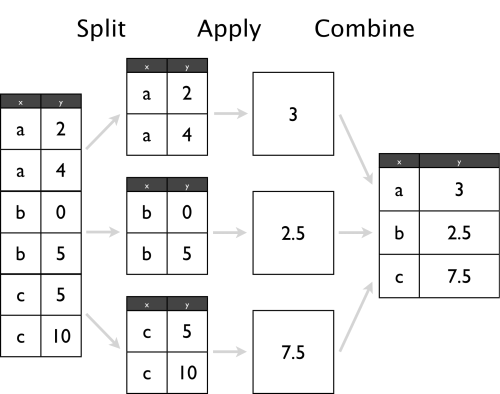

In [5]:
Image("../images/split_apply_combine.png")

### 8.1 SPLIT

In [31]:
kick_df.head()

,id,deadline,launched_at,state,location_type,backers_count,currency,goal,pledged,spotlight,static_usd_rate,usd_pledged,country,country_state,category_type,category_subtype
0,1361433686,2016-10-27 18:11:36,2016-09-27 18:11:36,successful,Town,121,EUR,5000.0,5000.0,True,1.123406,5000.0,FR,Paris,art,digital art
1,1851713855,2016-12-10 17:06:51,2016-10-11 16:06:51,successful,Town,7,GBP,100.0,100.0,True,1.241912,100.0,GB,Bournemouth,art,digital art
2,675977754,2016-11-21 02:00:00,2016-10-19 16:50:43,successful,Town,201,CAD,12000.0,12000.0,True,0.763064,12000.0,CA,Montreal,art,digital art
3,158101895,2016-12-03 10:52:53,2016-11-03 09:52:53,successful,Town,31,USD,300.0,300.0,True,1.000000,300.0,US,Philadelphia,art,digital art
4,656509465,2016-12-12 11:43:27,2016-11-12 11:43:27,successful,Town,16,GBP,500.0,500.0,True,1.256416,500.0,GB,London,art,digital art


In [22]:
country_grp = kick_df.groupby('country')

In [38]:
country_grp

In [41]:
country_grp.groups

{'AT': Int64Index([  1109,   1127,   1128,   2536,   2577,   2777,   2834,   5159,
               6596,   6645,
             ...
             150391, 150435, 150599, 150688, 150725, 150772, 151717, 152725,
             153125, 154576],
            dtype='int64', length=217),
 'AU': Int64Index([    20,     37,     70,    124,    130,    176,    315,    348,
                359,    369,
             ...
             156167, 156209, 156307, 156516, 156545, 156693, 156761, 156922,
             156968, 157016],
            dtype='int64', length=3414),
 'BE': Int64Index([    71,   1258,   1295,   1336,   2572,   2580,   2820,   3605,
               3940,   3956,
             ...
             149720, 149735, 149752, 149904, 150589, 150686, 150915, 152239,
             152305, 153210],
            dtype='int64', length=281),
 'CA': Int64Index([     2,     66,    116,    139,    188,    326,    361,    370,
                383,    390,
             ...
             156774, 156847, 156861, 15691

In [40]:
for name, group in country_grp:
    print(name, len(group))

AT 217
AU 3414
BE 281
CA 6404
CH 301
DE 1677
DK 535
ES 891
FR 1205
GB 14232
HK 211
IE 372
IT 1169
JP 20
LU 21
MX 691
NL 1318
NO 345
NZ 629
SE 795
SG 168
US 122231


### 8.2 APPLY

In [42]:
kick_df.groupby('country')['goal'].apply(np.mean)

country
AT     27512.935547
AU    100450.453125
BE     32898.441406
CA     71135.960938
CH    562963.375000
          ...      
NO    161598.093750
NZ     21958.003906
SE    439678.187500
SG     30519.410156
US     46185.796875
Name: goal, Length: 22, dtype: float64

In [46]:
kick_df.country.unique()

[FR, GB, CA, US, DE, ..., AT, HK, LU, SG, JP]
Length: 22
Categories (22, object): [FR, GB, CA, US, ..., HK, LU, SG, JP]

## 9. Basic Visualization 

In [49]:
import seaborn as sns

### Sum of amount raised by individual countries

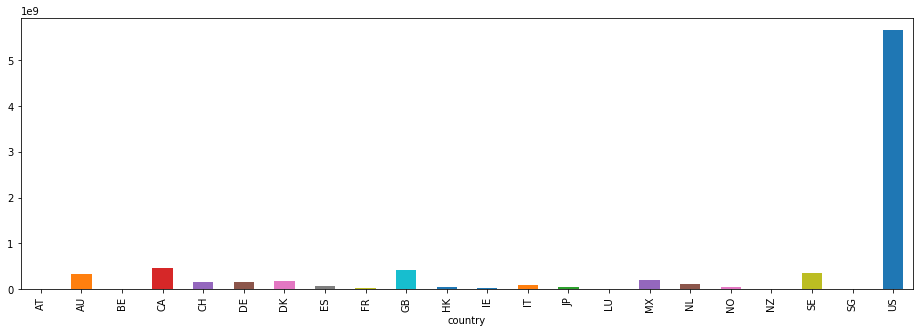

In [68]:
kick_df.groupby('country')['goal'].apply(np.sum).plot.bar()

### Average of amount raised by individual countries

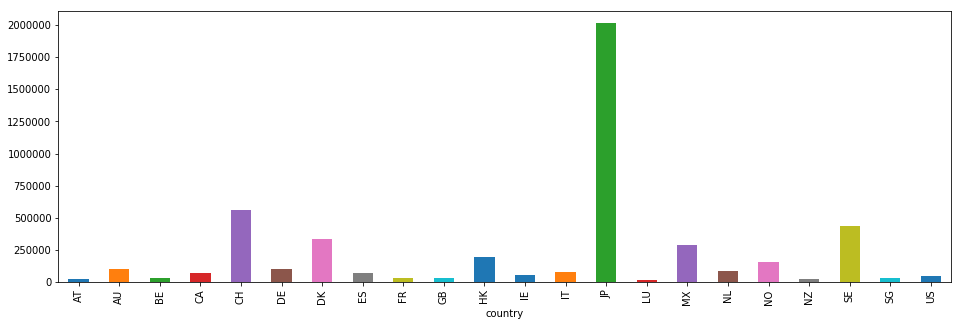

In [66]:
kick_df.groupby('country')['goal'].apply(np.mean).plot.bar()

## Yearly distribution of the plot

In [12]:
# create a column which ihas teh year of lanch info
kick_df['launched_year'] = kick_df['launched_at'].apply(lambda x: x.year)

In [20]:
kick_df.groupby('launched_year')['id'].count()

launched_year
2009      439
2010     3803
2011     9869
2012    14196
2013    13996
2014    31685
2015    37937
2016    25104
2017    19417
Name: id, dtype: int64

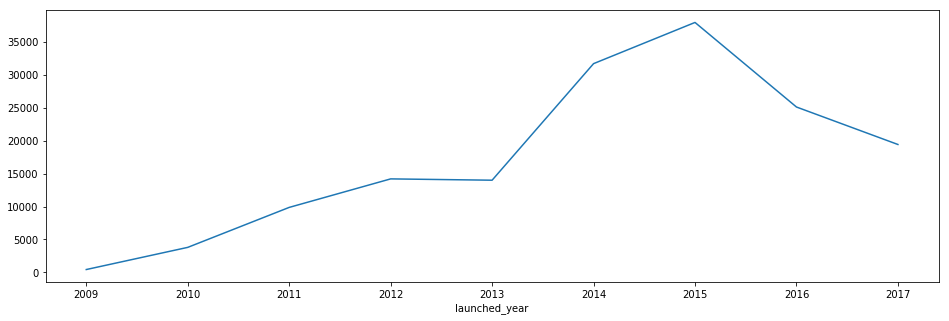

In [23]:
kick_df.groupby('launched_year')['id'].count().plot()

## Month distribution of the plot

In [25]:
# create a column which ihas teh year of lanch info
kick_df['launched_month'] = kick_df['launched_at'].apply(lambda x: x.month)

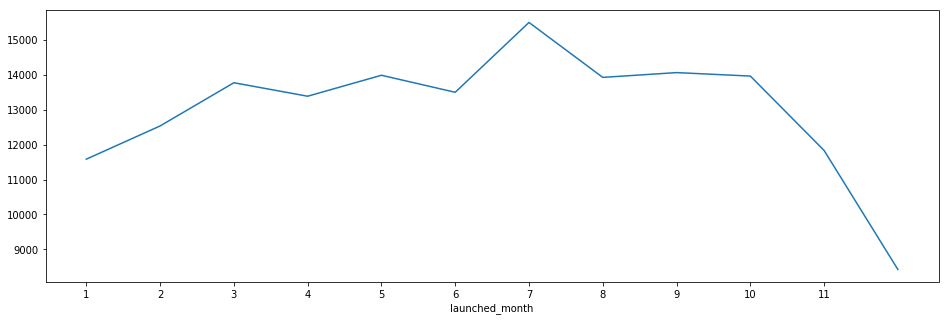

In [33]:
plt.xticks(np.arange(1,12))
kick_df.groupby('launched_month')['id'].agg('count').plot()